# <center>Laboratorium 6<br>Metod Numerycznych</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, dokonać testu na platformie github, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

In [2]:
import main

import numpy as np
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt
from scipy.interpolate import barycentric_interpolate



***Zadanie 1.***  

Zaimplementować wzór barycentryczny podany na wykładzie jako funkcję barycentric_inte w main.py. Następnie dla funkcji ciągłej nieróżniczkowalnej z [Zadania domoego 2] przeprowadzić interpolację metodą  [barycentryczną](https://people.maths.ox.ac.uk/trefethen/barycentric.pdf) zarówno przy użyciu funkcji *[barycentric_interpolate](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.interpolate.barycentric_interpolate.html)* z pakietu *[Scipy](https://scipy.org/)* jak i za zaimplementowanego wzoru barycentrycznego. W tym celu należy:

 - Wykonać w węzłach Czebyszewa (zaimplementowanych w ramach zadania domowego) interpolację rzędu 10, 100, 1000, 10000, 100000.
 - Wykreślić wykresy obrazujące wyniki interpolacji (wykres oryginalnej funkcji i funkcji interpolującej w 1000 punktów).  
 - Przeanalizować czas obliczeń w zależności od rzędu interpolacji.  


Przykład użycia funkcji barycentric_interpolate:

In [78]:
# from scipy.interpolate import barycentric_interpolate
# # funkcja do interpolacji
# f = lambda x: np.cos(x)+x**2

# # wektor współrzędnych x dla których chcemy wyliczyć wartości wielomianu interpolacyjnego
# x = np.linspace(-1,1,1000)

# # węzły Czebyszewa 
# interpolation_nodes_number = 10
# xch = np.cos(np.linspace(1,interpolation_nodes_number,interpolation_nodes_number)*np.pi/interpolation_nodes_number)

# # interpoalcja metodą barycentryczną
# yimp = barycentric_interpolate(xch,f(xch),x)

# plt.plot(x,f(x),'b',  linewidth=3 ,label = 'cos(x)+x**2')
# plt.plot(x,yimp,'r',label = 'interpolacja')
# plt.plot(xch,f(xch),'go',label = 'węzły interpolacji')
# plt.xlabel("x")
# plt.ylabel("y")
# plt.legend(loc = 0)
# plt.grid()
# plt.show()

Text(0.5, 0.98, 'Interpolacja funkcji ciągłej nieróżniczkowalnej')

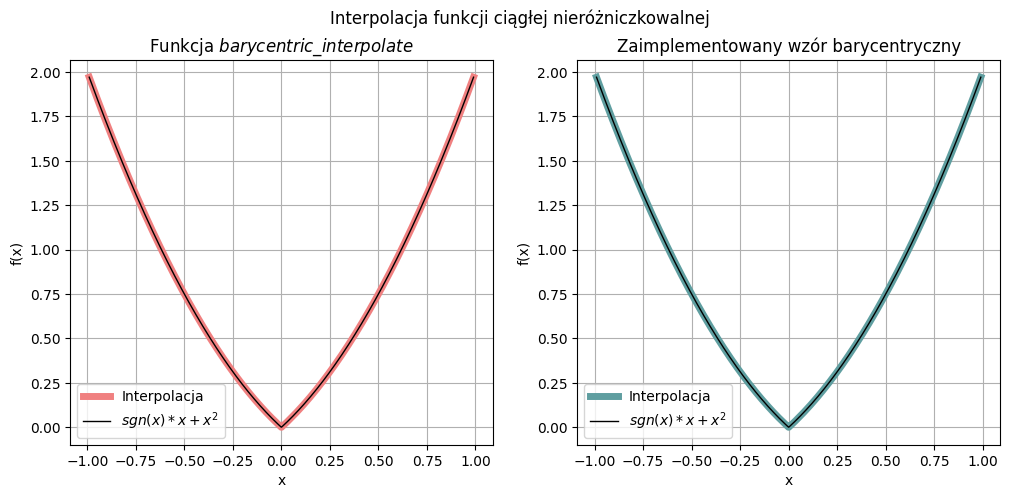

In [98]:
from scipy.interpolate import barycentric_interpolate
f = lambda x: np.sign(x)*x+x**2
x = np.linspace(-0.99, 0.99, 1000)
interpolation_nodes_number = 1000
xch = main.chebyshev_nodes(interpolation_nodes_number)

# funkcja barycentric
yimp1 = barycentric_interpolate(xch, f(xch), x)

#  zaimplementowany wzór
weights = main.bar_czeb_weights(interpolation_nodes_number)
yimp2 = main.barycentric_inte(xch, f(xch), weights, x)

_, (ax1, ax2) = plt.subplots(1,2, figsize= (12, 5))
ax1.plot(x, yimp1, color='lightcoral', linewidth= 5, label= 'Interpolacja')
ax1.plot(x, f(x), color= 'black', linewidth= 1, label= '$sgn(x)*x + {x}^{2}$' )
ax1.set(xlabel= 'x', ylabel= 'f(x)', title= 'Funkcja $barycentric$_$interpolate$')
ax1.grid()
ax1.legend()
ax2.plot(x, yimp2, color= 'cadetblue', linewidth= 5, label= 'Interpolacja')
ax2.plot(x, f(x), color= 'black', linewidth= 1, label= '$sgn(x)*x + {x}^{2}$' )
ax2.set(xlabel= 'x', ylabel= 'f(x)', title= 'Zaimplementowany wzór barycentryczny')
ax2.grid()
ax2.legend()
plt.suptitle('Interpolacja funkcji ciągłej nieróżniczkowalnej')

In [40]:
ranks = [10, 100, 1000, 10000, 100000]
f = lambda x: np.sign(x)*x+x**2

# zaimplementowany wzór
x = np.linspace(-0.99, 0.99, 1000)
cheb_nodes_list1 = []
inter_funs1 = []
times1 = []
for rank in ranks:
    cheb_nodes = main.chebyshev_nodes(rank)
    cheb_nodes_list1.append(cheb_nodes)
    weights = main.bar_czeb_weights(rank) 
    inter_funs1.append(main.barycentric_inte(cheb_nodes, f(cheb_nodes), weights, x))
    time = %timeit -r 1 -n 5 -o main.barycentric_inte(cheb_nodes, f(cheb_nodes), weights, x)
    times1.append(time.average)


7.84 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 5 loops each)
18.7 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 5 loops each)
117 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 5 loops each)
1.19 s ± 0 ns per loop (mean ± std. dev. of 1 run, 5 loops each)
11.6 s ± 0 ns per loop (mean ± std. dev. of 1 run, 5 loops each)


In [42]:
# funkcja barycentric
x = np.linspace(-0.99, 0.99, 1000)
cheb_nodes_list2 = []
inter_funs2 = []
times2 = []
for rank in ranks[:-1]:    
    cheb_nodes = main.chebyshev_nodes(rank)
    cheb_nodes_list2.append(cheb_nodes)
    inter_funs2.append(barycentric_interpolate(cheb_nodes, f(cheb_nodes), x))
    time = %timeit -r 1 -n 5 -o barycentric_interpolate(cheb_nodes, f(cheb_nodes), x)
    times2.append(time.average)

1.01 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 5 loops each)
3.56 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 5 loops each)
37.9 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 5 loops each)
777 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 5 loops each)


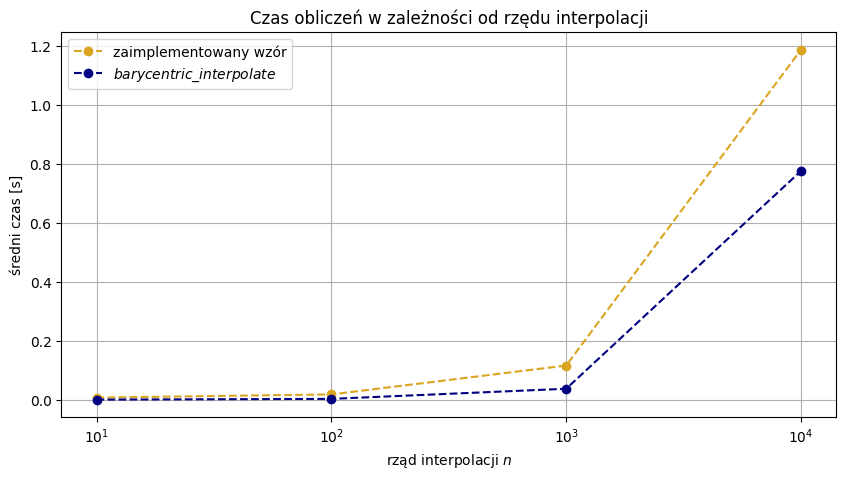

In [46]:
labels = ['${10}^{1}$', '${10}^{2}$', '${10}^{3}$', '${10}^{4}$']
_, ax = plt.subplots(figsize= (10, 5))
ax.plot(labels, times1[:-1], '--o', color= 'goldenrod', label= 'zaimplementowany wzór')
ax.plot(labels, times2, '--o', color= 'navy', label= '$barycentric$_$interpolate$')
ax.set(xlabel= 'rząd interpolacji $n$', ylabel= 'średni czas [s]', title= 'Czas obliczeń w zależności od rzędu interpolacji' )
ax.grid()
ax.legend()

***Wnioski:***

W celu implementacji funkcji *barycentric_inte* skorzystałam z drugiej formy wzoru barycentrycznego. W trakcie realizacji zadania przeprowadziłam interpolacje różnych rzędów funkcji o zadanej charakterystyce. Dzięki przedstawieniu wyników na wykresie przekonałam się, że zarówno wbudowana funkcja pakietu *scipy.interpolate*, jak i wersja zaimplementowana na podstawie wzoru dały równie dobre wyniki. Zgodnie z oczekiwaniami, czas znacznie rośnie wraz ze wzrostem rzędu interpolacji. Z wykresu porównującego czas potrzebny do obliczeń można wywnioskować, że wbudowana funkcja działa szybciej. Jednakże, dla rzędu $n = 100 000$ okazała się ona nieskuteczna. Czas wykonywania był na tyle długi, że musiałam przerwać działanie programu, natomiast zaimplementowana funkcja poradziła sobie z zadaniem (mimo znacznego wydłużenia czasu, który wyniósł ponad 11 sekund).

***Zadanie 2.***  
Dla funkcji jednokrotnie i trzykrotnie różniczkowalnej z [Zadania domowego 2]. Przeanalizować w pętli jakość interpolacji dla różnych rzędów interpolacji $n$. 

W tym celu należy:
- wyliczyć wartość funkcji i wielomianu interpolacyjnego w 1000 punktów (nie będącymi węzłami interpolacji np. punkty równoodległe),
- wyliczyć normę różnicy tych wektorów (normę błędu) dla każdego badanego rzędu, maksymalny rząd należy przyjąć gdy błąd będzie na poziomie zera maszynowego.
- dla każdej z funkcji sporządzić wykres w skali podwójnie logarytmicznej (obie osie), w którym oś argumentów to rząd interpolacji a oś wartości to odpowiadająca mu norma błędu,
- dla porównania umieścić na wykresie dodatkowo wykres $n^{-v}$, gdzie $v$ to rząd najwyższej pochodnej funkcji (zobacz wykład).

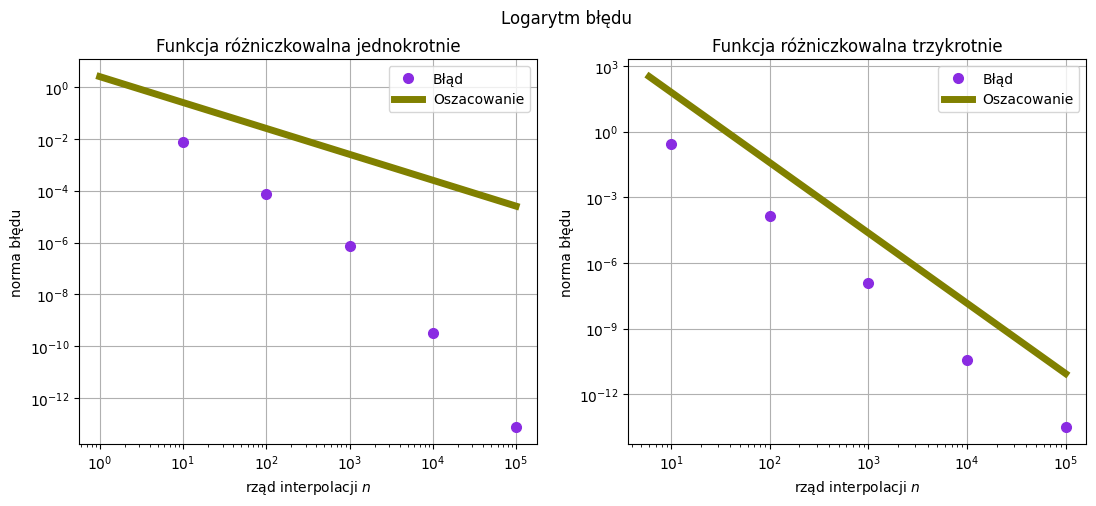

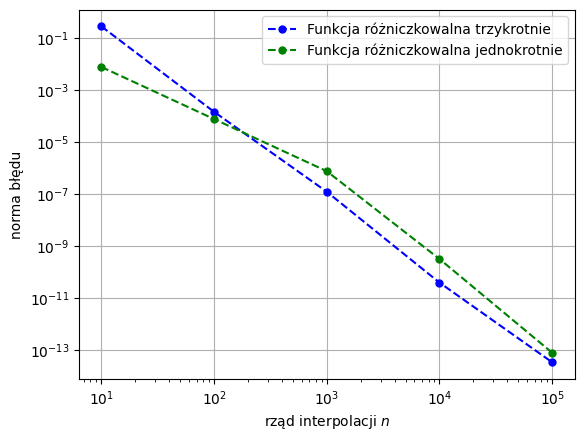

In [52]:
# funkcja jednokrotnie różniczkowalna
points = np.linspace(-0.99, 0.99, 1000)
ranks = [10, 100, 1000, 10000, 100000]

f2 = lambda x: np.sign(x)*(x**2)
values = f2(points)
values_inte = []
for rank in ranks:
    cheb_nodes = main.chebyshev_nodes(rank)
    weights = main.bar_czeb_weights(rank)
    values_inte.append(main.barycentric_inte(cheb_nodes, f2(cheb_nodes), weights, points))
norms1 = []
for values_inte_r in  values_inte:
    norms1.append(main.L_inf(values, values_inte_r))

f2_prim = lambda x: 2*x
V = sp.integrate.quad(f2_prim, 0, 1)
V = 2 * V[0]
v = 1
bound = lambda n: 4*V/(np.pi*v*(n-v)**v)

_, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))
ax1.loglog(ranks, norms1, 'o', markersize=7, color= 'blueviolet', label= 'Błąd')
ax1.loglog([1,1e5],[bound(2),bound(1e5)], linewidth= 5, label= 'Oszacowanie', color=  'olive')
# ax1.loglog(ranks, [1/n for n in ranks], linewidth= 10)
ax1.set(xlabel= 'rząd interpolacji $n$', ylabel= 'norma błędu', title= 'Funkcja różniczkowalna jednokrotnie' )
ax1.grid()
ax1.legend()

# funkcja trzykrotnie różniczkowalna
f3 = lambda x: (np.abs(np.sin(5*x)))**3
values = f3(points)
values_inte = []
for rank in ranks:
    cheb_nodes = main.chebyshev_nodes(rank)
    weights = main.bar_czeb_weights(rank)
    values_inte.append(main.barycentric_inte(cheb_nodes, f3(cheb_nodes), weights, points))
norms2 = []
for values_inte_r in  values_inte:
    norms2.append(main.L_inf(values_inte_r, values))

V = 2.102e4
v = 3
bound = lambda n: 4*V/(np.pi*v*(n-v)**v)
ax2.loglog(ranks, norms2, 'o', markersize=7, color= 'blueviolet', label= 'Błąd')
ax2.loglog([6,1e5],[bound(6),bound(1e5)], linewidth= 5, label= 'Oszacowanie', color=  'olive')
ax2.set(xlabel= 'rząd interpolacji $n$', ylabel= 'norma błędu', title= 'Funkcja różniczkowalna trzykrotnie' )
ax2.grid()
ax2.legend()
plt.suptitle('Logarytm błędu')

_, ax = plt.subplots()
ax.loglog(ranks, norms2, '--o', markersize=5, color= 'b', label= 'Funkcja różniczkowalna trzykrotnie')
ax.loglog(ranks, norms1, '--o', markersize=5, color= 'g',  label= 'Funkcja różniczkowalna jednokrotnie')
ax.legend()
ax.set(xlabel= 'rząd interpolacji $n$', ylabel= 'norma błędu')
ax.grid()


***Wnioski:***

Naszym celem w powyższym zadaniu była analiza jakości interpolacji w zależności od jej rzędu. W trakcie realizacji zadania przeanalizowałam dwie funkcje: jedno- i trzykrotnie różniczkowalną. Do obliczania normy nieskończoność korzystałam z zaimplementowanej funkcji *L_inf*. Dodatkowo, wyznaczyłam proste w skali logarytmicznej, które odpowiadały oszaczowaniu błędu interpolacji na podstawie zasady interpolacji Czebyszewa dla funkcji różniczkowalnych. W tym celu wyznaczyłam wahanie funkcji *V*. Na wykresach obrazujących normę błędu można zauważyć, że wspomniana zasada jest spełniona. Dodatkowo, porównałam dokładność obliczeń w zależności od stopnia różniczkowalności funkcji. Dla obu analizowanych przypadków funkcje dały zbliżone jakościowo wyniki. 



***Zadanie 3.***  
Dla funkcji nieciągłej z [Zadania domowego 2] przeanalizować efekt Gibbsa
oddzielnie dla parzystych i nieparzystych $n$. Oddzielnie wyliczyć jaki jest minimalny błąd niezależny od rzędu. Dlaczego wartości dla parzystych i nieparzystych $n$ się różnią?   
***Wskazówka:*** Wykonać wykres funkcji i jej funkcji interpolującej.

Text(0.5, 0.98, 'Porównanie rozmieszczenia węzłów Czebyszewa')

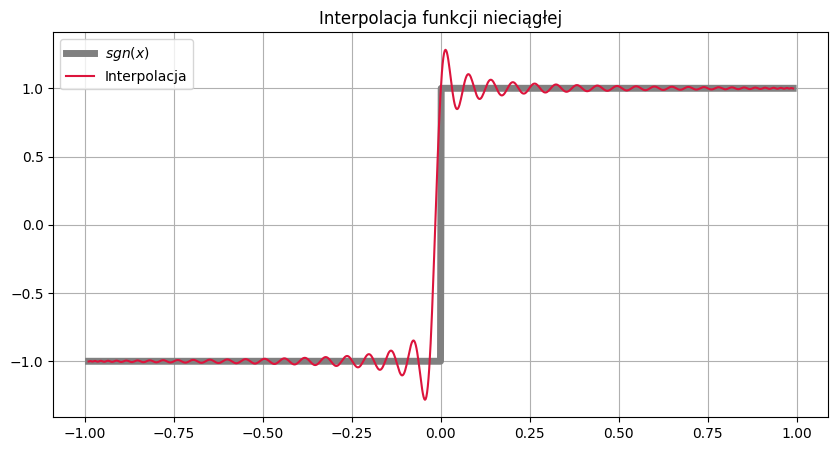

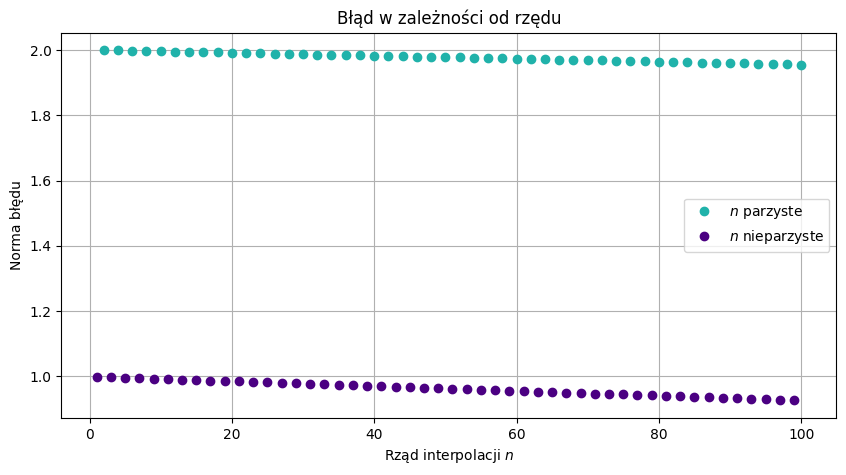

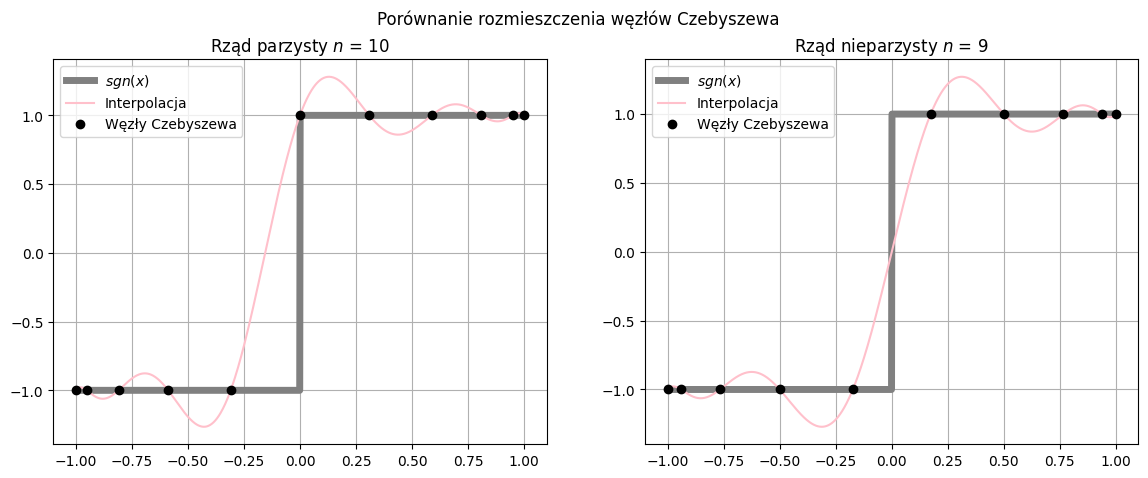

In [24]:
f5 = lambda x: np.sign(x)
x = np.linspace(-0.99, 0.99, 1000)
max_rank = 101
norm_odd = []
norm_even = []

for n in range(1, max_rank):
    cheb_nodes = main.chebyshev_nodes(n)
    weights = main.bar_czeb_weights(n)
    fun_inter = main.barycentric_inte(cheb_nodes, f5(cheb_nodes), weights, x)
    if n % 2 == 0:
        norm_even.append(main.L_inf(f5(x), fun_inter))
    else:
        norm_odd.append(main.L_inf(f5(x), fun_inter))
    if n == 100:
        fig, ax = plt.subplots(figsize= (10, 5))       
        ax.plot(x, f5(x), label= '$sgn(x)$', color= 'gray', linewidth= 5)
        ax.plot(x, fun_inter, label= 'Interpolacja', color= 'crimson')        
        ax.grid()
        plt.title('Interpolacja funkcji nieciągłej')
        plt.legend()    

_, ax = plt.subplots(figsize= (10, 5))
ax.plot([2*i for i in range(1, 51)], norm_even, 'o', label= '$n$ parzyste', color= 'lightseagreen')
ax.plot([2*i + 1 for i in range(0,50 )], norm_odd, 'o', label= '$n$ nieparzyste', color= 'indigo')
ax.grid()
ax.set(title= 'Błąd w zależności od rzędu', xlabel= 'Rząd interpolacji $n$', ylabel= 'Norma błędu')
ax.legend()

_, (ax1, ax2) = plt.subplots(1, 2, figsize= (14, 5))   
cheb_nodes1 = main.chebyshev_nodes(10)
weights1 = main.bar_czeb_weights(10)
fun_inter1 = main.barycentric_inte(cheb_nodes1, f5(cheb_nodes1), weights1, x)    
ax1.plot(x, f5(x), label= '$sgn(x)$', color= 'gray', linewidth= 5)
ax1.plot(x, fun_inter1, label= 'Interpolacja', color= 'pink')        
ax1.grid() 
ax1.plot(cheb_nodes1, f5(cheb_nodes1), 'ko', label= 'Węzły Czebyszewa')
ax1.legend()
ax1.set(title= 'Rząd parzysty $n$ = 10')
cheb_nodes2 = main.chebyshev_nodes(9)
weights2 = main.bar_czeb_weights(9)
fun_inter2 = main.barycentric_inte(cheb_nodes2, f5(cheb_nodes2), weights2, x)  
ax2.plot(x, f5(x), label= '$sgn(x)$', color= 'gray', linewidth= 5)
ax2.plot(x, fun_inter2, label= 'Interpolacja', color= 'pink')        
ax2.grid() 
ax2.plot(cheb_nodes2, f5(cheb_nodes2), 'ko', label= 'Węzły Czebyszewa')
ax2.legend()
ax2.set(title= 'Rząd nieparzysty $n$ = 9')
plt.suptitle('Porównanie rozmieszczenia węzłów Czebyszewa')


***Wnioski:***

Dzięki realizacji ostatniego zadania mogłam zobaczyć, jak działa efekt Gibbsa. Podczas interpolacji funkcji nieciągłych nie jesteśmy w stanie uniknąć błędów. Wykres zależności normy błędu od rzędu interpolacji pokazał, że niedokładność nie zależy silnie od rzędu interpolacji, więc zwiększenie rzędu nie jest rozwiązaniem, jak w przypadku wcześniej analizowanych przypadków. Oscylacje będą wciąż widoczne. Dodatkowo, mogłam zaobserwować, w jaki sposób funkcja interpolacyjna oscyluje w okolicach odpowiednich wartości w pobliżu punktu nieciągłości. Wyniki okazały się dokładniejsze w przypadku nieparzystych rzędów interpolacji. Wynika to z tego, że w przypadku parzystych rzędów otrzymujemy nieparzystą liczbę węzłów Czebyszewa. Środkowy węzeł posiada wartość 0, a pozostałe są rozmieszczone symetrycznie względem niego. Punkt zero stanowi punkt nieciągłości analizowanej funkcji, przez co błąd obliczeń zwiększa się. 

Materiały uzupełniające:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)